In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
##punto a

In [ ]:
json1 = pd.read_json('/content/gdrive/My Drive/Colab Notebooks/solutions.json')
json1

,l,k,solution,gcd,n
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11
...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8


In [ ]:
json1['s_max'] = json1['solution'].apply(lambda l: max(map(abs,l)))
json1

,l,k,solution,gcd,n,s_max
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8
...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31


In [ ]:
json1['sum_s'] = json1['solution'].apply(lambda i : sum(i))
json1['sum_s^3'] = json1['sum_s'].apply(lambda i : i**3 )
json1

,l,k,solution,gcd,n,s_max,sum_s,sum_s^3
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6,0,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8,0,0
...,...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,0,0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,0,0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32,0,0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,0,0


In [ ]:
import random
np.random.seed(1000832943)
a = np.random.randint(390073)
cf = json1.loc[a][2]
pO = np.poly1d(cf)
print(pO)

   11     10     9     8      7      6      5      4      3      2
5 x  + 6 x  + 8 x + 9 x - 10 x + 12 x - 13 x - 17 x + 19 x - 23 x - 27 x + 31


In [ ]:
r = np.roots(pO)
raicesreal = r[r.imag == 0]
rr = raicesreal.real
print(rr)

[-1.63348786  1.          0.75436736]


In [ ]:
d = pO.deriv()
print(d)

    10      9      8      7      6      5      4      3      2
55 x  + 60 x + 72 x + 72 x - 70 x + 72 x - 65 x - 68 x + 57 x - 46 x - 27


<function matplotlib.pyplot.show>

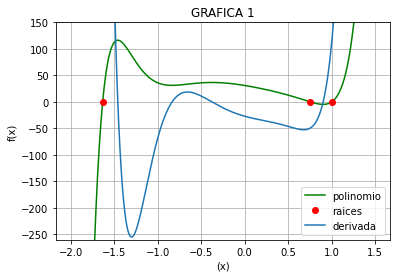

In [ ]:
x = np.linspace(-2,1.5,1000)
plt.figure()
plt.title('GRAFICA POLINOMIO DEL DATA FRAME')
plt.ylabel('f(x)')
plt.xlabel('(x)')
plt.grid()
plt.plot(x,pO(x),label= "polinomio", color = "green")
plt.plot(rr,pO(rr),'ro',label = "raices")
plt.plot(x,d(x),label = "derivada")
plt.legend()
plt.ylim(-260,150)
plt.show

In [179]:
#punto b
np.random.seed(1000832943)
b = np.random.randint(1,5)
print(b,"como me salio el numero 1 se escoge la ecuacion numero 1")
p = np.random.random(1)
print(p,"valor de p")

1 como me salio el numero 1 se escoge la ecuacion numero 1
[0.72076748] valor de p


In [184]:
from scipy import optimize
def f (v):
  return (v*(np.exp(v))) - p
v = np.linspace(-10,10,100)
J = 1
root2 = optimize.fixed_point(lambda v: v - f(v),J, maxiter = 2000)

<function matplotlib.pyplot.show>

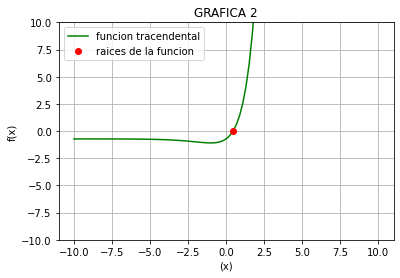

In [185]:
plt.figure()
plt.title('GRAFICA FUNCION TRACENDENTAL')
plt.ylabel('f(x)')
plt.xlabel('(x)')
plt.grid()
plt.plot(v,f(v),label= "funcion tracendental", color = "green")
plt.plot(root2,f(root2),'ro',label = "raices de la funcion")
plt.legend()
plt.ylim(-10,10)
plt.show